# Heart Disease Classification usign Decision Tree  #

### 23AIML042

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree


In [111]:
# Load dataset
data = pd.read_csv('C:/Drive (D)/College/SEM. - 6/ADML/Dataset/heart_disease_uci.csv')
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [112]:
# Check the shape and structure
data.shape       # Dimensions (rows, columns)

(920, 16)

In [113]:
data.info()      # Info about data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [114]:
numerical_columns = data.select_dtypes(include=["int64","float64"]).columns
categorical_columns = data.select_dtypes(include=["object"]).columns

print(f"Numerical Columns: {numerical_columns}\nCategorical Columns: {categorical_columns}")

Numerical Columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')
Categorical Columns: Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [115]:
data.describe()  # Summary statistics of numerical features

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [116]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [117]:
df = data.copy(deep=True)

In [118]:
for col in numerical_columns:
    median = df[col].median()
    df[col] = df[col].fillna(median)

for col in categorical_columns:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)


C:\Users\vedan\AppData\Local\Temp\ipykernel_24992\637533459.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode)


In [119]:
df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## Exploratory Data Analysis (EDA)

C:\Users\vedan\AppData\Local\Temp\ipykernel_24992\242006628.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=df, palette='Set2')


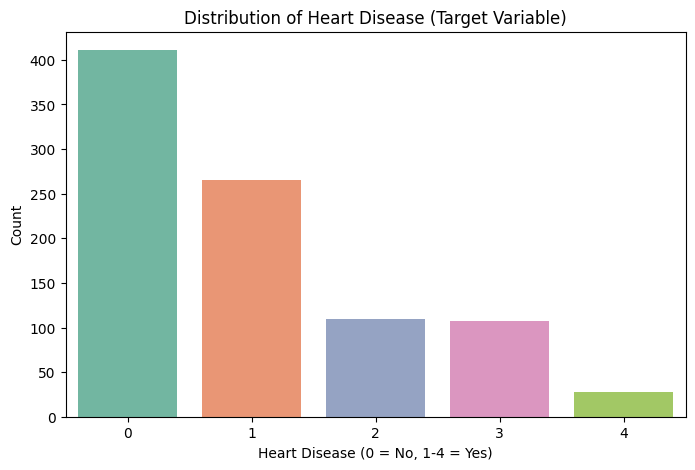

Target Variable Distribution:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [120]:
# Target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='num', data=df, palette='Set2')
plt.title('Distribution of Heart Disease (Target Variable)')
plt.xlabel('Heart Disease (0 = No, 1-4 = Yes)')
plt.ylabel('Count')
plt.show()

# Check class distribution
print("Target Variable Distribution:")
print(df['num'].value_counts())

In [121]:
# Convert target to binary (0 = No Disease, 1 = Disease)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

print("Binary Target Distribution:")
print(df['target'].value_counts())
print(f"\nPercentage with Heart Disease: {df['target'].mean()*100:.2f}%")

Binary Target Distribution:
target
1    509
0    411
Name: count, dtype: int64

Percentage with Heart Disease: 55.33%


In [122]:
# Histograms for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['id', 'num', 'target'])

C:\Users\vedan\AppData\Local\Temp\ipykernel_24992\1051169155.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='viridis')
C:\Users\vedan\AppData\Local\Temp\ipykernel_24992\1051169155.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='viridis')
C:\Users\vedan\AppData\Local\Temp\ipykernel_24992\1051169155.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='viridis')
C:\Users\vedan\AppData\Local\Temp\ipykernel_24992\1051169155.

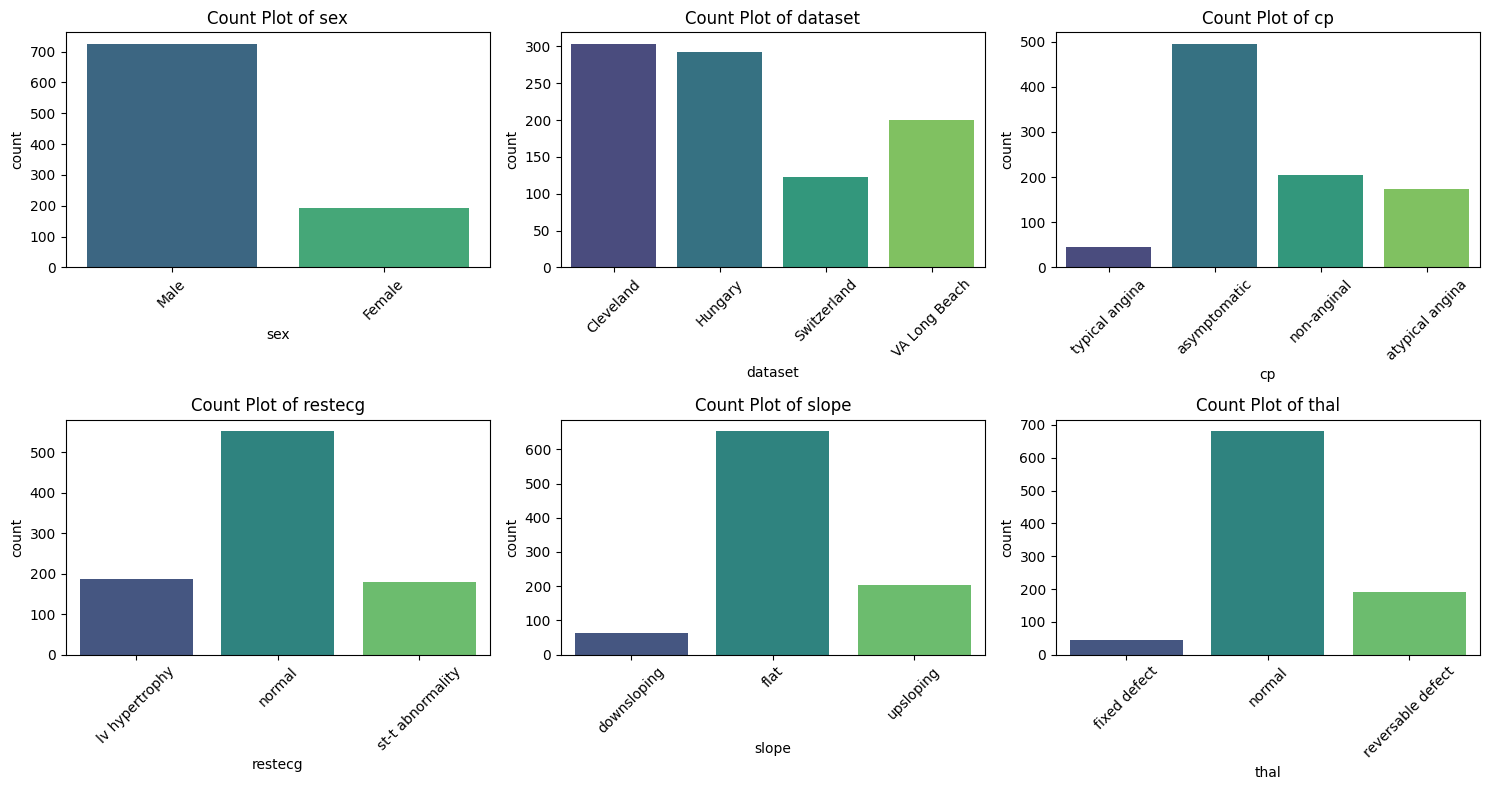

In [123]:
# Count plots for categorical features
cat_cols = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    if i < len(axes):
        sns.countplot(x=col, data=df, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Count Plot of {col}')
        axes[i].tick_params(axis='x', rotation=45)

for j in range(len(cat_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

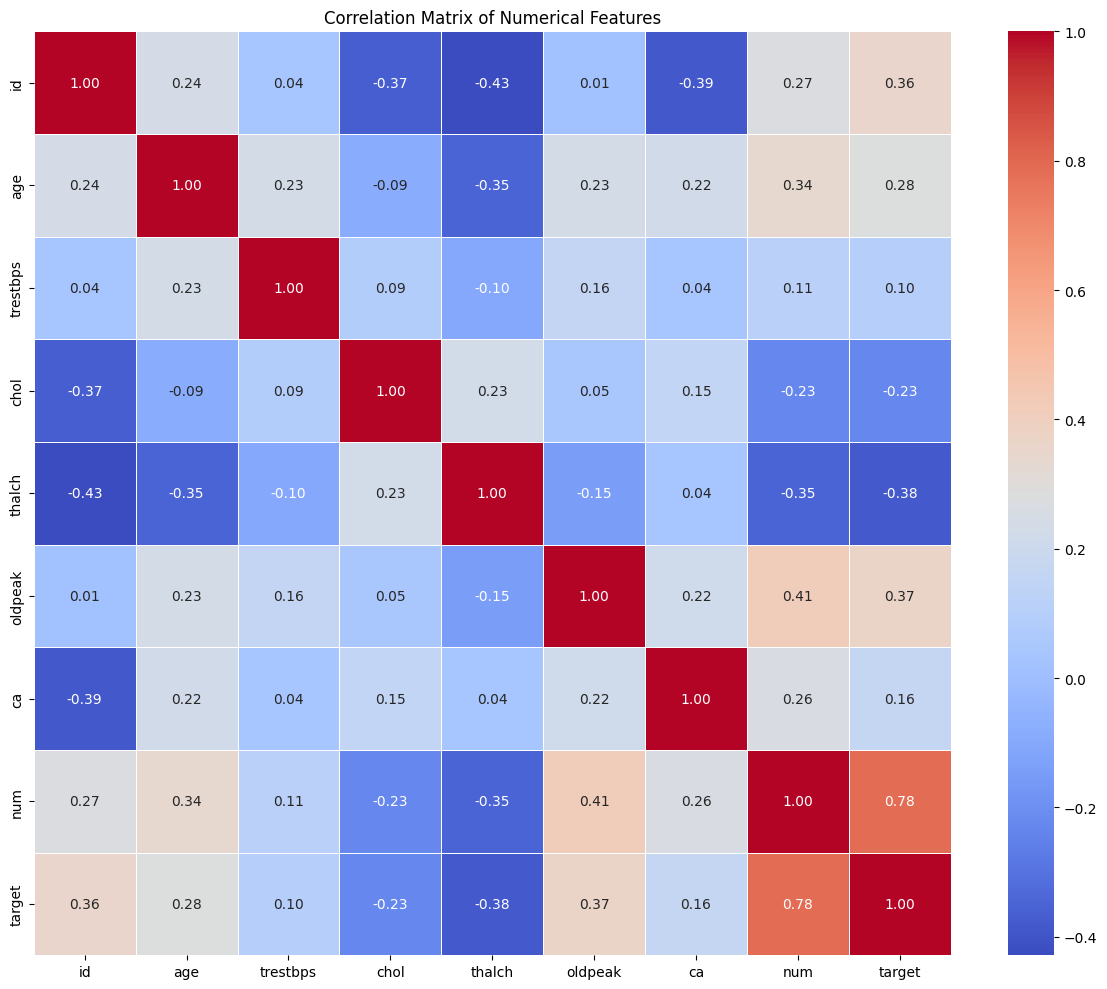

In [124]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

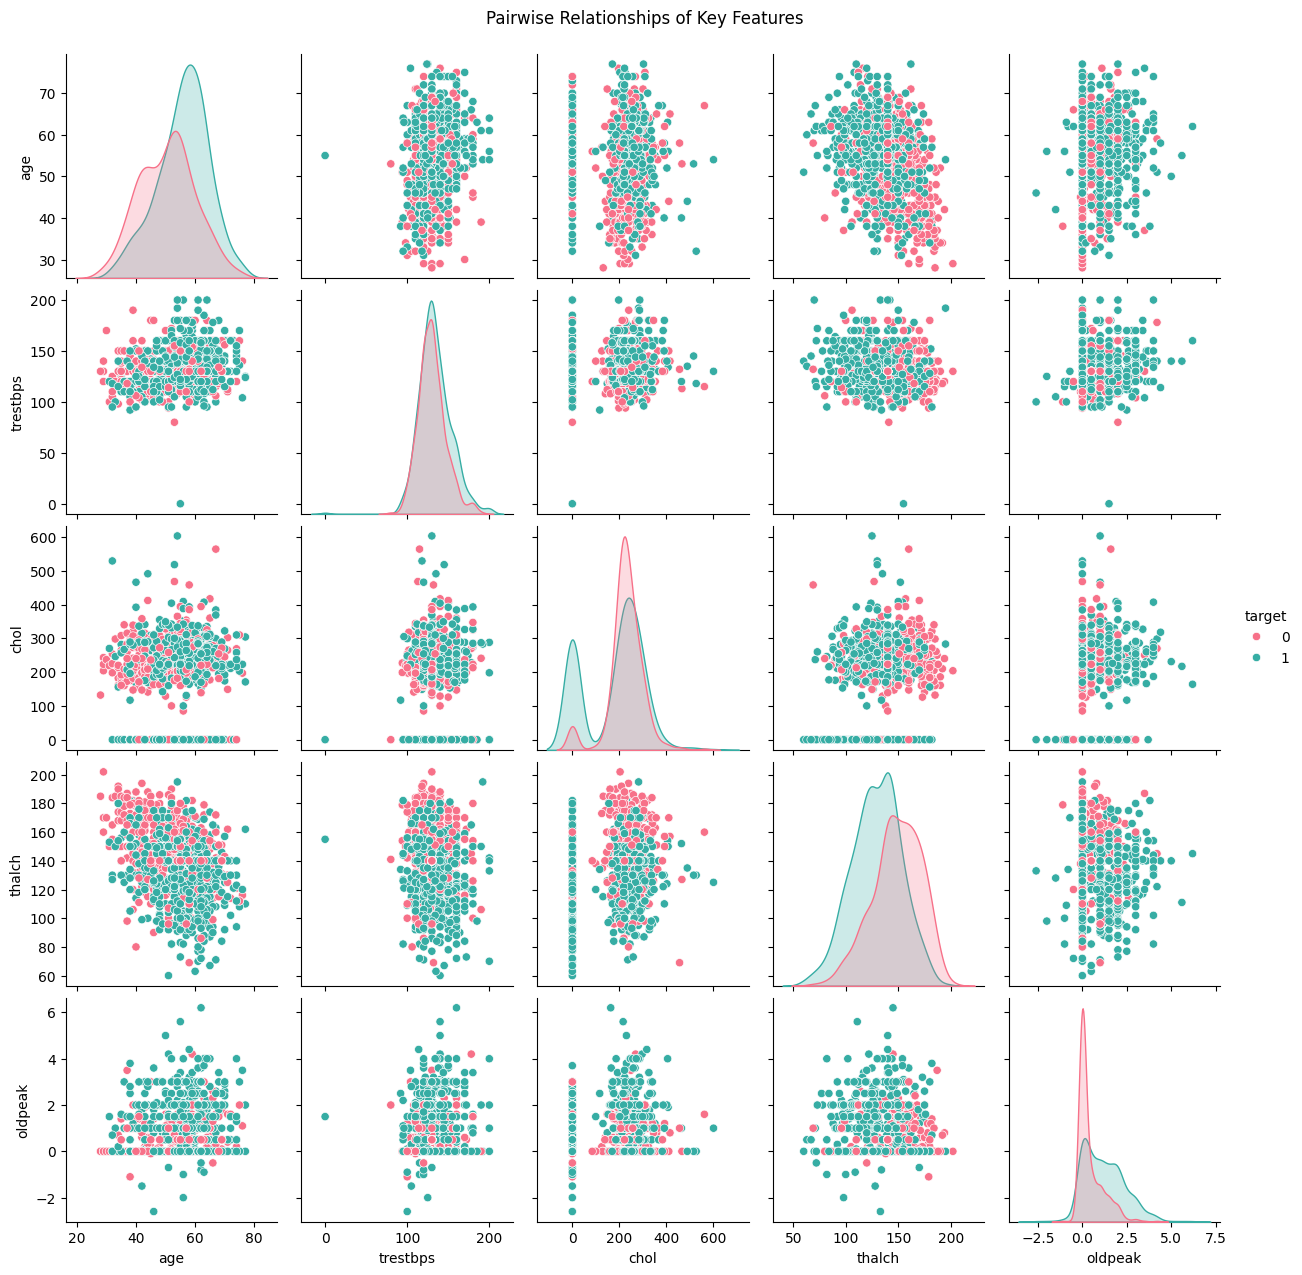

In [125]:
# Pairplot for key features vs target
key_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'target']
sns.pairplot(df[key_features], hue='target', palette='husl', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Key Features', y=1.02)
plt.show()

## Data Preprocessing

### Encoding Categorical Variables using LabelEncoder

In [126]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

sex: {'Female': np.int64(0), 'Male': np.int64(1)}
dataset: {'Cleveland': np.int64(0), 'Hungary': np.int64(1), 'Switzerland': np.int64(2), 'VA Long Beach': np.int64(3)}
cp: {'asymptomatic': np.int64(0), 'atypical angina': np.int64(1), 'non-anginal': np.int64(2), 'typical angina': np.int64(3)}
restecg: {'lv hypertrophy': np.int64(0), 'normal': np.int64(1), 'st-t abnormality': np.int64(2)}
slope: {'downsloping': np.int64(0), 'flat': np.int64(1), 'upsloping': np.int64(2)}
thal: {'fixed defect': np.int64(0), 'normal': np.int64(1), 'reversable defect': np.int64(2)}


In [127]:
# Check the dataframe after encoding
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,target
0,1,63,1,0,3,145.0,233.0,True,0,150.0,False,2.3,0,0.0,0,0,0
1,2,67,1,0,0,160.0,286.0,False,0,108.0,True,1.5,1,3.0,1,2,1
2,3,67,1,0,0,120.0,229.0,False,0,129.0,True,2.6,1,2.0,2,1,1
3,4,37,1,0,2,130.0,250.0,False,1,187.0,False,3.5,0,0.0,1,0,0
4,5,41,0,0,1,130.0,204.0,False,0,172.0,False,1.4,2,0.0,1,0,0


In [128]:
# Separate features (X) and target variable (y)
# Drop id, num (original target), and keep encoded features
X = df.drop(['id', 'num', 'target', 'dataset'], axis=1)
y = df['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures used: {list(X.columns)}")

Features shape: (920, 13)
Target shape: (920,)

Features used: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [129]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for better visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1.007386,0.516931,2.319860,0.705176,0.303643,2.380476,-1.567991,0.489727,-0.760292,1.368109,-2.234081,-0.361400,-2.397813
1,1.432034,0.516931,-0.818774,1.518569,0.789967,-0.420084,-1.567991,-1.181478,1.315283,0.611589,-0.295067,4.411152,-0.328406
2,1.432034,0.516931,-0.818774,-0.650479,0.266939,-0.420084,-1.567991,-0.345875,1.315283,1.651804,-0.295067,2.820301,1.741001
3,-1.752828,0.516931,1.273649,-0.108217,0.459634,-0.420084,0.015491,1.961979,-0.760292,2.502889,-2.234081,-0.361400,-0.328406
4,-1.328180,-1.934494,0.227437,-0.108217,0.037541,-0.420084,-1.567991,1.365120,-0.760292,0.517024,1.643946,-0.361400,-0.328406


In [130]:
# Split data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"\nTraining target distribution:\n{pd.Series(y_train).value_counts(normalize=True)}")
print(f"\nTesting target distribution:\n{pd.Series(y_test).value_counts(normalize=True)}")

Training set size: 736
Testing set size: 184

Training target distribution:
target
1    0.552989
0    0.447011
Name: proportion, dtype: float64

Testing target distribution:
target
1    0.554348
0    0.445652
Name: proportion, dtype: float64


## Model Building: Decision Tree Classifier

### Baseline Model with Default Hyperparameters

In [131]:
# Train baseline Decision Tree Classifier with default parameters
baseline_dt = DecisionTreeClassifier(random_state=42)
baseline_dt.fit(X_train, y_train)

# Predictions
y_train_pred_baseline = baseline_dt.predict(X_train)
y_test_pred_baseline = baseline_dt.predict(X_test)

print("Baseline Decision Tree Classifier trained successfully!")
print(f"\nTree Depth: {baseline_dt.get_depth()}")
print(f"Number of Leaves: {baseline_dt.get_n_leaves()}")

Baseline Decision Tree Classifier trained successfully!

Tree Depth: 17
Number of Leaves: 145


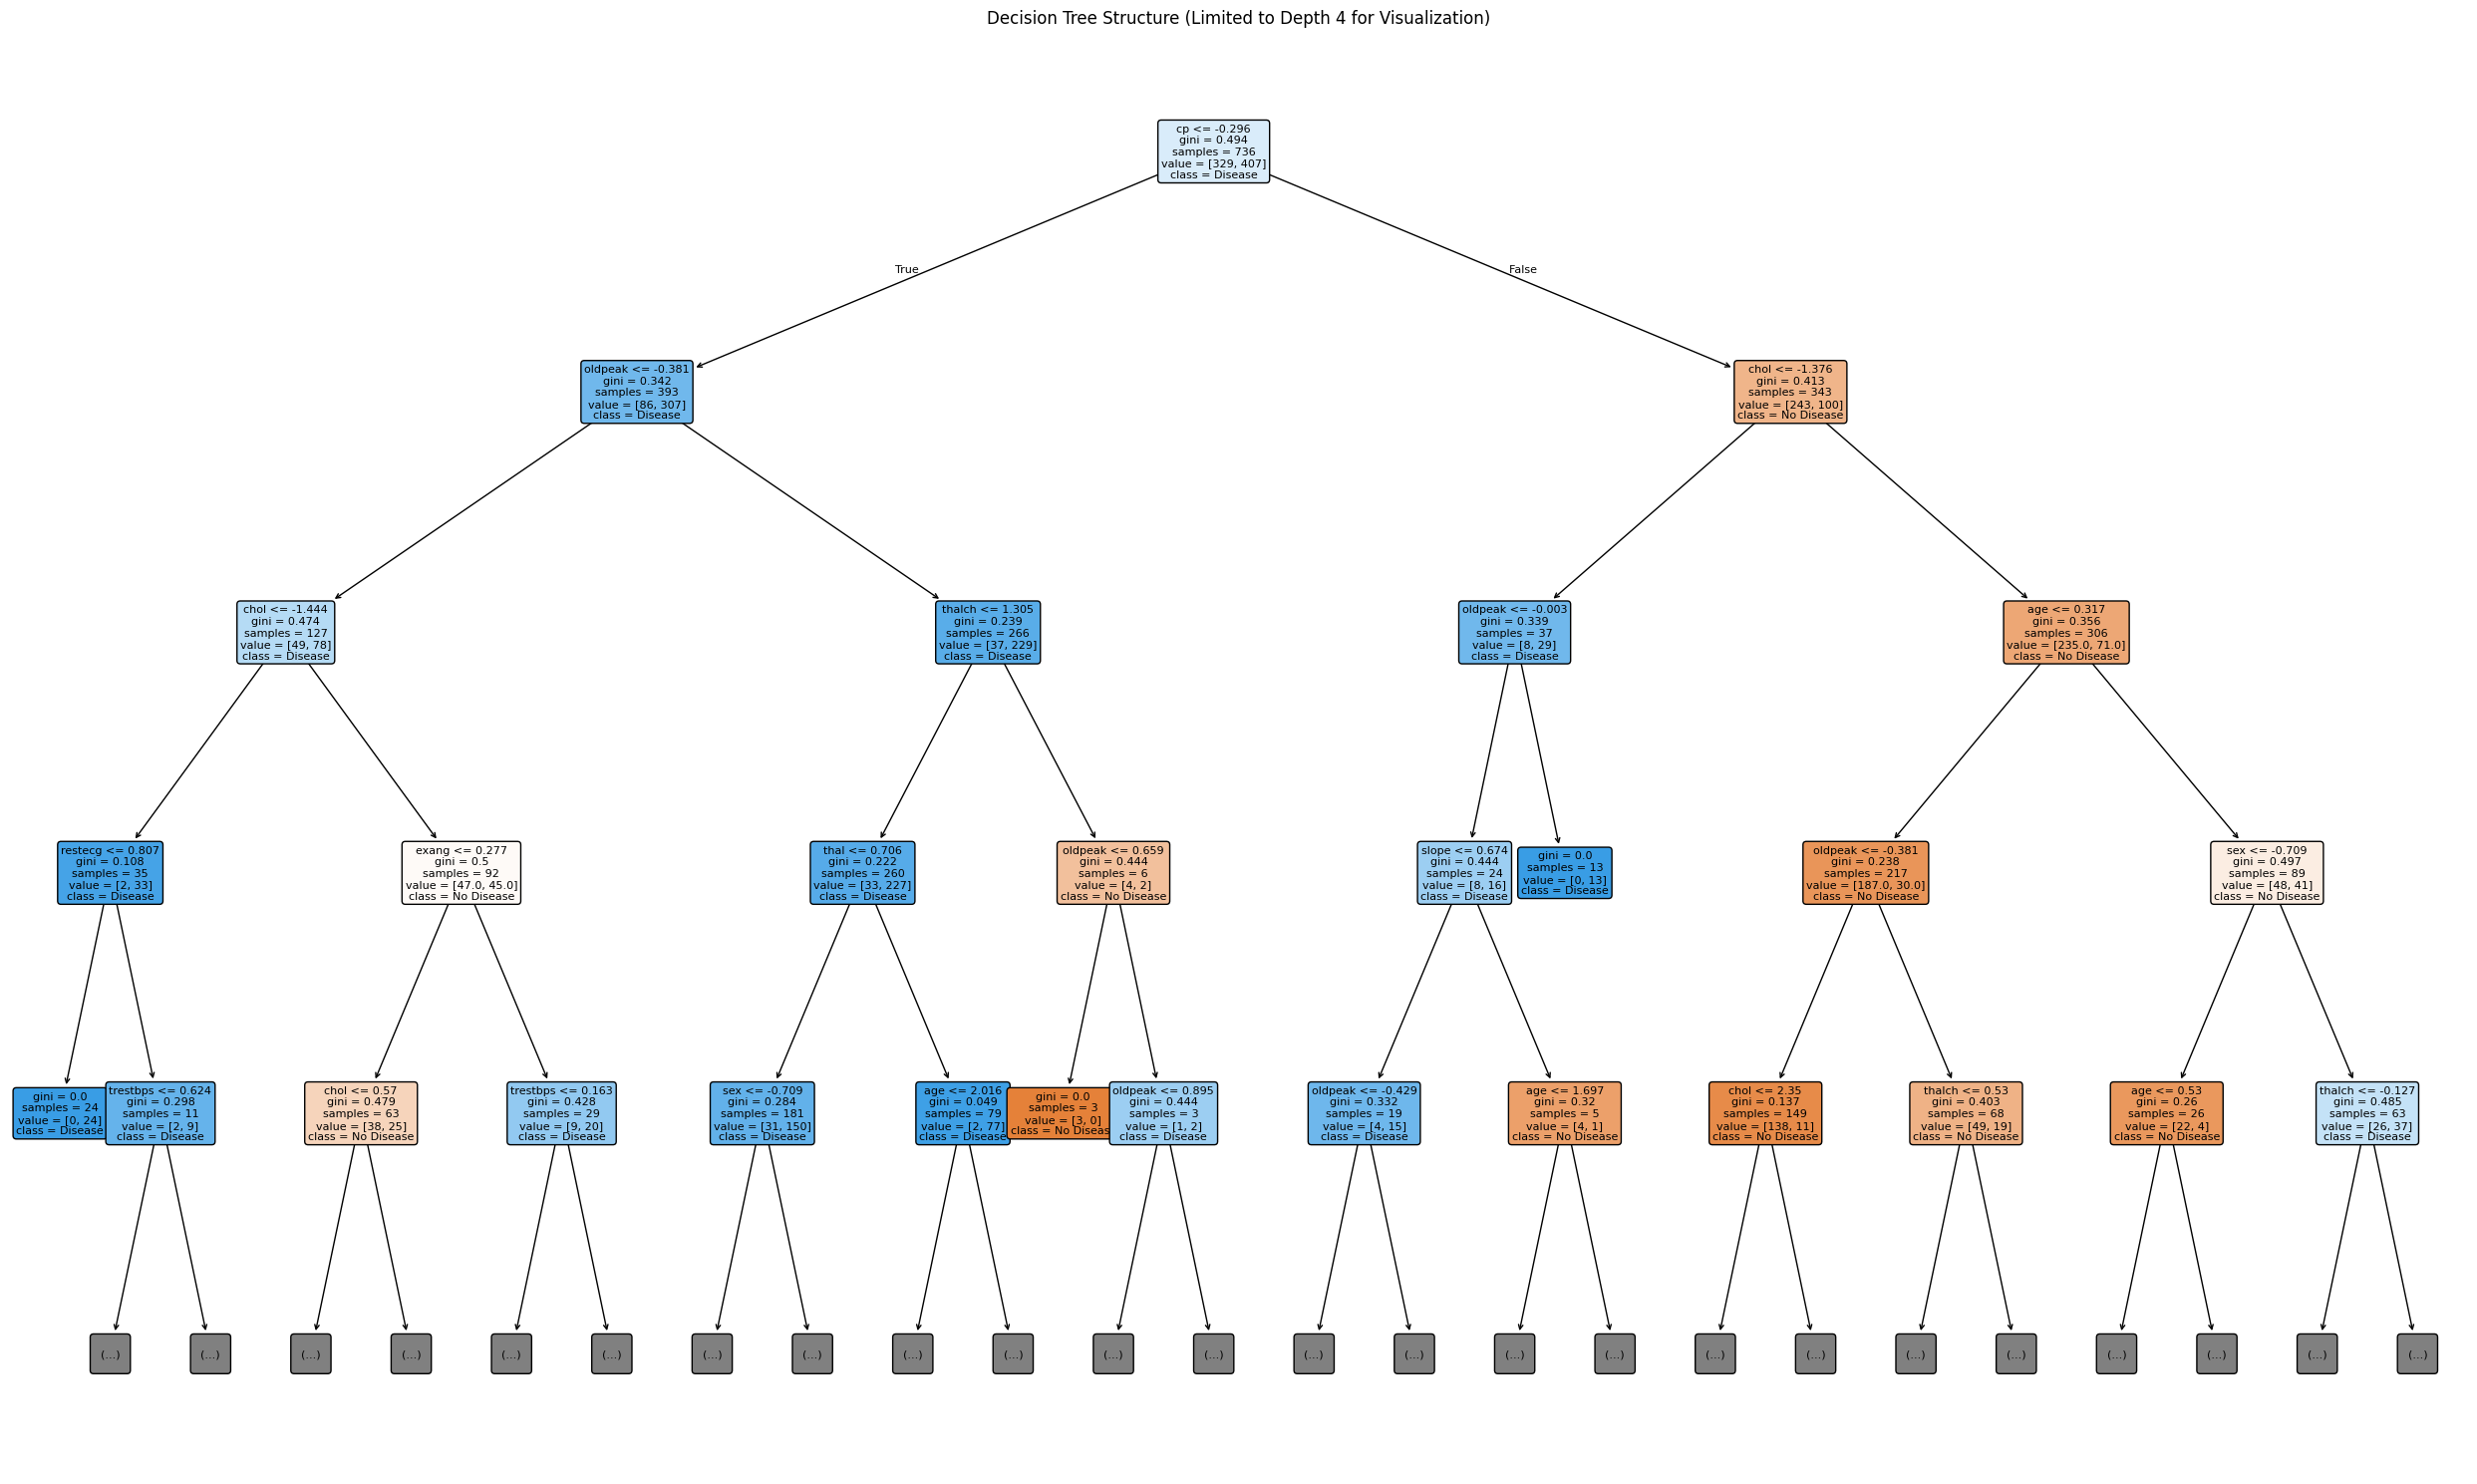

In [132]:
# Visualize the baseline decision tree
plt.figure(figsize=(25, 15))
plot_tree(baseline_dt, 
          feature_names=X.columns, 
          class_names=['No Disease', 'Disease'],
          filled=True, 
          rounded=True,
          fontsize=8,
          max_depth=4)  # Limiting depth for visualization
plt.title('Decision Tree Structure (Limited to Depth 4 for Visualization)')
plt.tight_layout()
plt.show()

In [133]:
# Baseline model evaluation
print("BASELINE DECISION TREE PERFORMANCE")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_baseline):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred_baseline):.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_baseline, target_names=['No Disease', 'Disease']))

BASELINE DECISION TREE PERFORMANCE
Training Accuracy: 1.0000
Testing Accuracy: 0.7609

Classification Report (Test Set):
              precision    recall  f1-score   support

  No Disease       0.74      0.71      0.72        82
     Disease       0.77      0.80      0.79       102

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.76      0.76      0.76       184



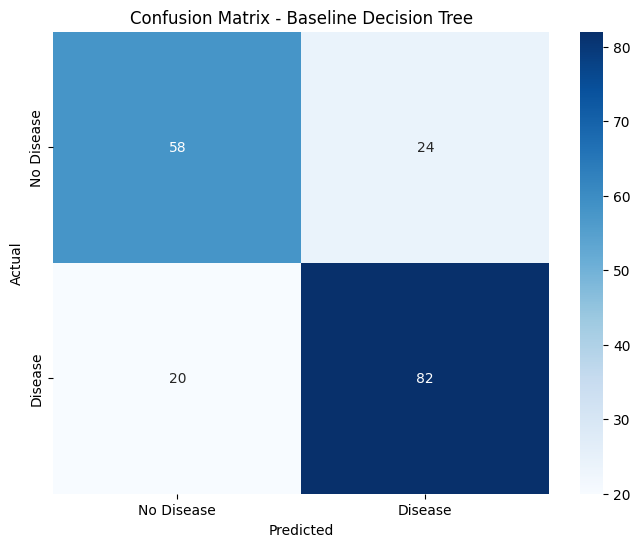


True Negatives: 58
False Positives: 24
False Negatives: 20
True Positives: 82


In [134]:
# Confusion Matrix for baseline model
plt.figure(figsize=(8, 6))
cm_baseline = confusion_matrix(y_test, y_test_pred_baseline)
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Baseline Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\nTrue Negatives: {cm_baseline[0,0]}")
print(f"False Positives: {cm_baseline[0,1]}")
print(f"False Negatives: {cm_baseline[1,0]}")
print(f"True Positives: {cm_baseline[1,1]}")

## Hyperparameter Tuning & Optimization

Using GridSearchCV with cross-validation to find optimal hyperparameters

In [135]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=dt_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # Using F1 score for imbalanced medical data
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

print("\nGrid Search completed!")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits

Grid Search completed!


In [136]:
# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation F1 Score: {grid_search.best_score_:.4f}")

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-Validation F1 Score: 0.8002


In [137]:
# Get the best model
best_dt = grid_search.best_estimator_

# Predictions with tuned model
y_train_pred_tuned = best_dt.predict(X_train)
y_test_pred_tuned = best_dt.predict(X_test)

print(f"Tuned Tree Depth: {best_dt.get_depth()}")
print(f"Tuned Number of Leaves: {best_dt.get_n_leaves()}")

Tuned Tree Depth: 4
Tuned Number of Leaves: 15


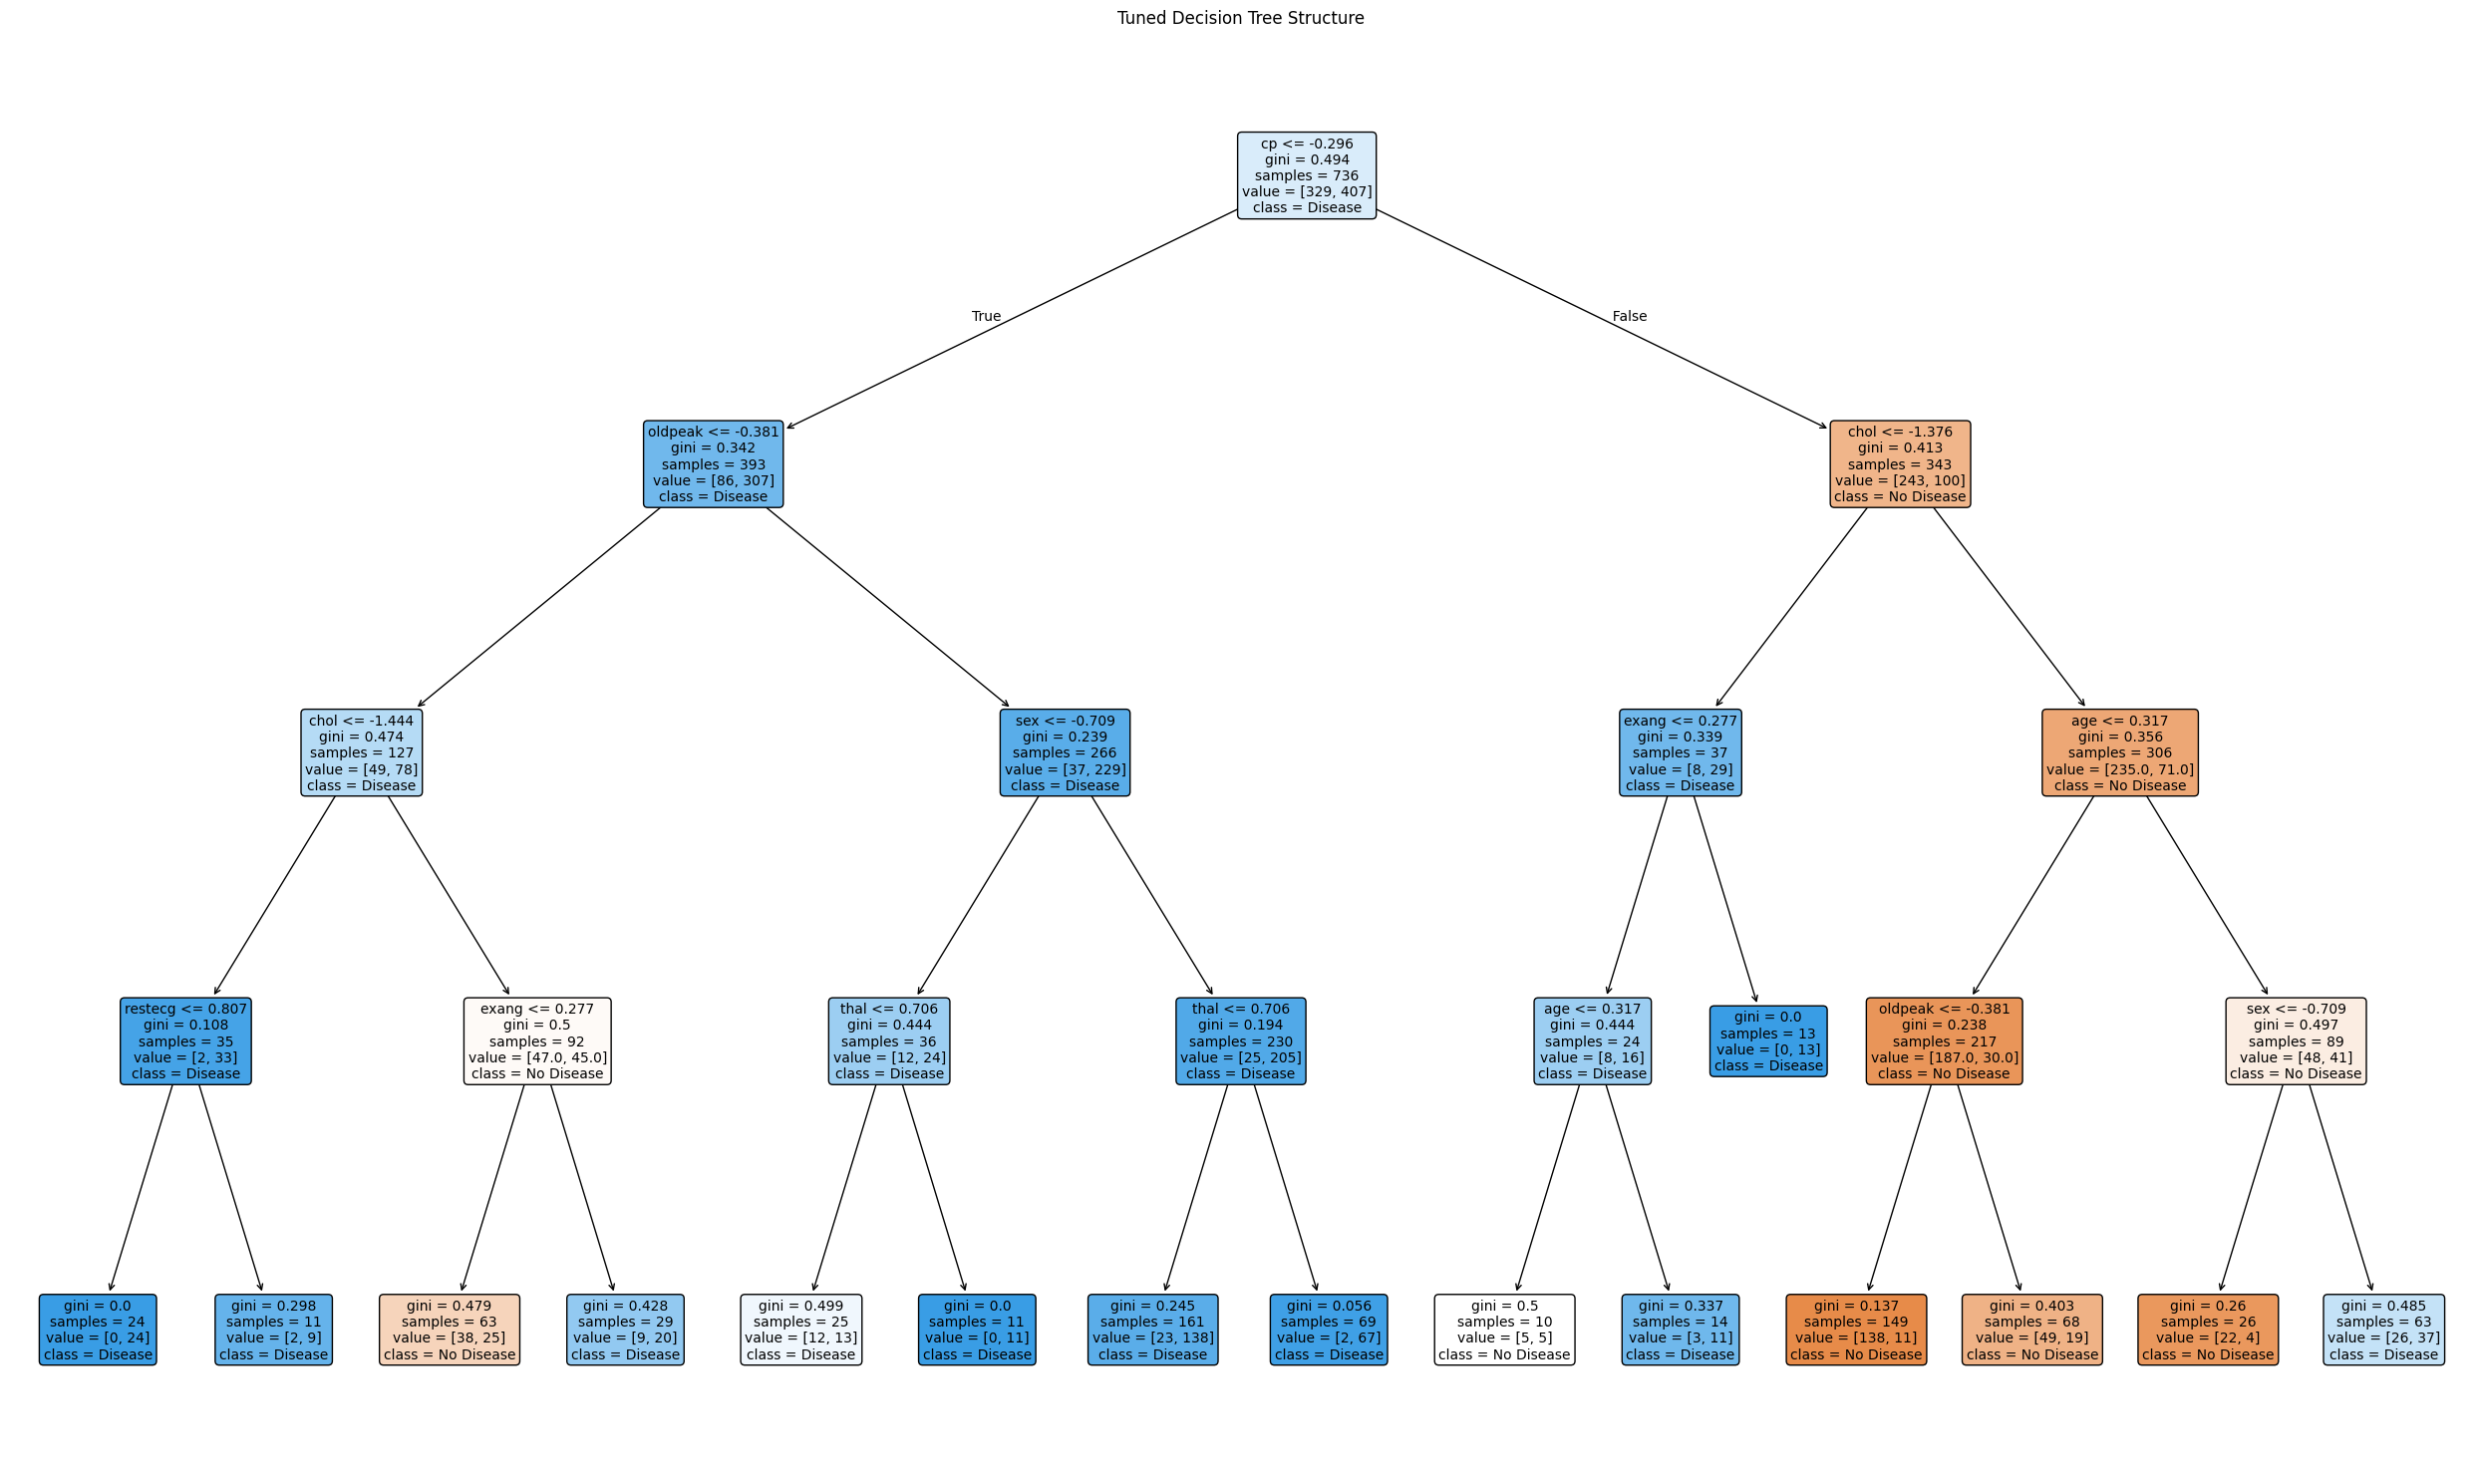

In [138]:
# Visualize the tuned decision tree
plt.figure(figsize=(25, 15))
plot_tree(best_dt, 
          feature_names=X.columns, 
          class_names=['No Disease', 'Disease'],
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title('Tuned Decision Tree Structure')
plt.tight_layout()
plt.show()

In [139]:
# Bias-Variance Tradeoff Analysis
print("Baseline Model:")
print(f"  Training Accuracy: {accuracy_score(y_train, y_train_pred_baseline):.4f}")
print(f"  Testing Accuracy: {accuracy_score(y_test, y_test_pred_baseline):.4f}")
print(f"  Gap: {accuracy_score(y_train, y_train_pred_baseline) - accuracy_score(y_test, y_test_pred_baseline):.4f}")

print("\nTuned Model:")
print(f"  Training Accuracy: {accuracy_score(y_train, y_train_pred_tuned):.4f}")
print(f"  Testing Accuracy: {accuracy_score(y_test, y_test_pred_tuned):.4f}")
print(f"  Gap: {accuracy_score(y_train, y_train_pred_tuned) - accuracy_score(y_test, y_test_pred_tuned):.4f}")

Baseline Model:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.7609
  Gap: 0.2391

Tuned Model:
  Training Accuracy: 0.8084
  Testing Accuracy: 0.7989
  Gap: 0.0095


## Model Evaluation & Performance Assessment

In [140]:
# Evaluation of tuned model
from sklearn.metrics import precision_score, recall_score, f1_score

print("TUNED DECISION TREE PERFORMANCE")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_tuned):.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_tuned, target_names=['No Disease', 'Disease']))

TUNED DECISION TREE PERFORMANCE
Accuracy: 0.7989
Precision: 0.8037
Recall: 0.8431
F1-Score: 0.8230

Classification Report (Test Set):
              precision    recall  f1-score   support

  No Disease       0.79      0.74      0.77        82
     Disease       0.80      0.84      0.82       102

    accuracy                           0.80       184
   macro avg       0.80      0.79      0.80       184
weighted avg       0.80      0.80      0.80       184



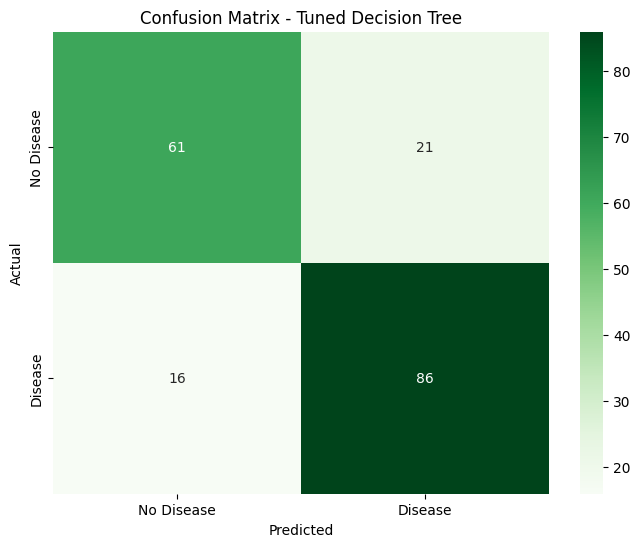


True Negatives (Correctly predicted No Disease): 61
False Positives (Incorrectly predicted Disease): 21
False Negatives (Missed Disease cases): 16
True Positives (Correctly predicted Disease): 86


In [141]:
# Confusion Matrix for tuned model
plt.figure(figsize=(8, 6))
cm_tuned = confusion_matrix(y_test, y_test_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Tuned Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\nTrue Negatives (Correctly predicted No Disease): {cm_tuned[0,0]}")
print(f"False Positives (Incorrectly predicted Disease): {cm_tuned[0,1]}")
print(f"False Negatives (Missed Disease cases): {cm_tuned[1,0]}")
print(f"True Positives (Correctly predicted Disease): {cm_tuned[1,1]}")

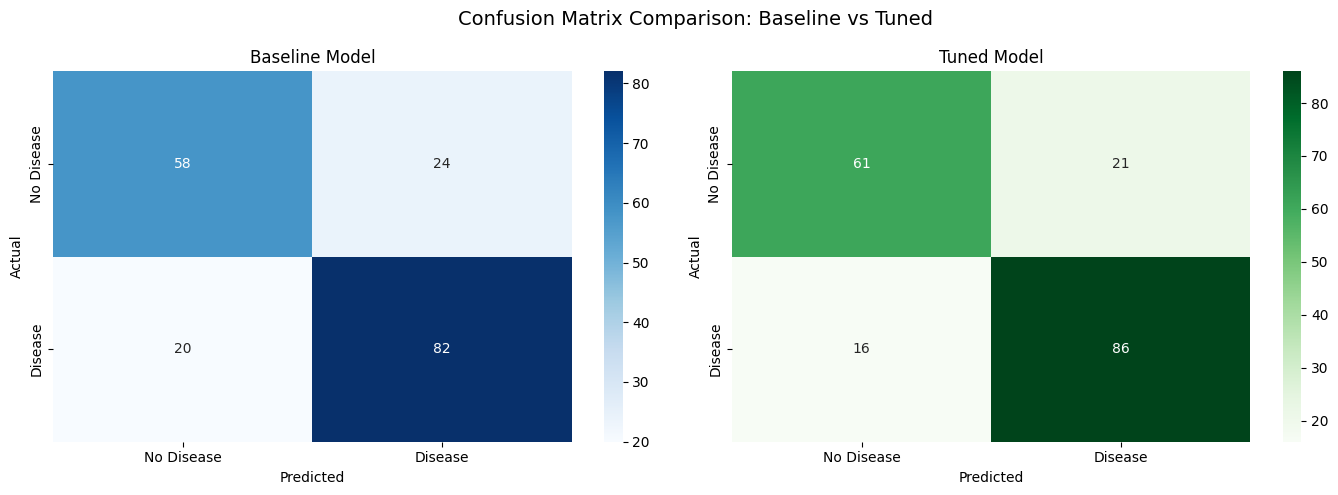

In [142]:
# Compare baseline vs tuned model
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Baseline confusion matrix
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
axes[0].set_title('Baseline Model')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Tuned confusion matrix
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
axes[1].set_title('Tuned Model')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.suptitle('Confusion Matrix Comparison: Baseline vs Tuned', fontsize=14)
plt.tight_layout()
plt.show()

In [143]:
# Performance comparison table
comparison_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Baseline': [
        accuracy_score(y_test, y_test_pred_baseline),
        precision_score(y_test, y_test_pred_baseline),
        recall_score(y_test, y_test_pred_baseline),
        f1_score(y_test, y_test_pred_baseline)
    ],
    'Tuned': [
        accuracy_score(y_test, y_test_pred_tuned),
        precision_score(y_test, y_test_pred_tuned),
        recall_score(y_test, y_test_pred_tuned),
        f1_score(y_test, y_test_pred_tuned)
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Improvement'] = comparison_df['Tuned'] - comparison_df['Baseline']
print("Model Comparison: Baseline vs Tuned")
print(comparison_df.to_string(index=False))

Model Comparison: Baseline vs Tuned
   Metric  Baseline    Tuned  Improvement
 Accuracy  0.760870 0.798913     0.038043
Precision  0.773585 0.803738     0.030153
   Recall  0.803922 0.843137     0.039216
 F1-Score  0.788462 0.822967     0.034505


### Importance of Recall in Medical Diagnosis

In medical diagnosis, **Recall (Sensitivity)** is particularly important because:
- **False Negatives are costly**: Missing a patient with heart disease (False Negative) can lead to delayed treatment and potentially fatal outcomes
- A high recall ensures we identify most patients who actually have heart disease
- It's better to have some false alarms (False Positives) than to miss actual disease cases

## Interpretation & Clinical Insight

### Feature Importance Analysis

Feature Importance Scores:
 Feature  Importance
      cp    0.524430
    chol    0.182370
 oldpeak    0.086071
     age    0.084055
     sex    0.060063
   exang    0.031530
    thal    0.028502
 restecg    0.002978
trestbps    0.000000
  thalch    0.000000
     fbs    0.000000
   slope    0.000000
      ca    0.000000


C:\Users\vedan\AppData\Local\Temp\ipykernel_24992\883341161.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


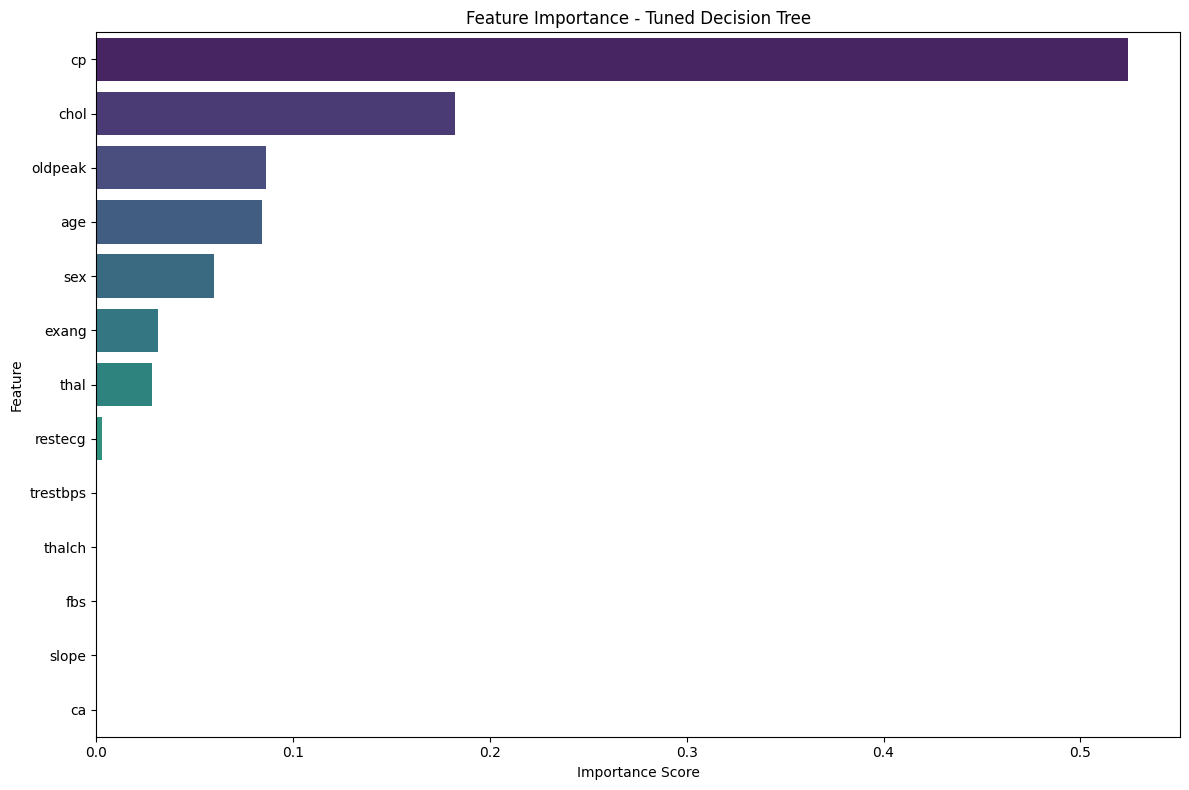

In [144]:
# Feature Importance from the tuned model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance Scores:")
print(feature_importance.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance - Tuned Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [145]:
# Top 5 most important features
print("Top 5 Important Features for Heart Disease Prediction:")

top_features = feature_importance.head(5)
feature_descriptions = {
    'cp': 'Chest Pain Type',
    'thal': 'Thalassemia',
    'ca': 'Number of Major Vessels',
    'oldpeak': 'ST Depression',
    'thalch': 'Maximum Heart Rate',
    'age': 'Age',
    'sex': 'Sex',
    'trestbps': 'Resting Blood Pressure',
    'chol': 'Cholesterol',
    'fbs': 'Fasting Blood Sugar',
    'restecg': 'Resting ECG',
    'exang': 'Exercise Induced Angina',
    'slope': 'Slope of ST Segment'
}

for idx, row in top_features.iterrows():
    feature = row['Feature']
    importance = row['Importance']
    desc = feature_descriptions.get(feature, 'Clinical feature')
    print(f"{feature}: {importance:.4f} - {desc}")

Top 5 Important Features for Heart Disease Prediction:
cp: 0.5244 - Chest Pain Type
chol: 0.1824 - Cholesterol
oldpeak: 0.0861 - ST Depression
age: 0.0841 - Age
sex: 0.0601 - Sex


In [146]:
# Cost Analysis of False Positives and False Negatives
print("False Positives (FP):", cm_tuned[0,1], "patients")
print("False Negatives (FN):", cm_tuned[1,0], "patients")

print("\nImpact of False Negatives:")
print("- Patients with heart disease incorrectly classified as healthy")
print("- May lead to delayed treatment")
print("- Critical in medical diagnosis")

print("\nImpact of False Positives:")
print("- Healthy patients incorrectly classified as having disease")
print("- May lead to unnecessary tests")

False Positives (FP): 21 patients
False Negatives (FN): 16 patients

Impact of False Negatives:
- Patients with heart disease incorrectly classified as healthy
- May lead to delayed treatment
- Critical in medical diagnosis

Impact of False Positives:
- Healthy patients incorrectly classified as having disease
- May lead to unnecessary tests


## Conclusion

### Project Outcomes

This project successfully demonstrated:

1. **Data Understanding & EDA**: Explored the Heart Disease UCI dataset, identified feature distributions, correlations, and potential outliers through various visualizations.

2. **Data Preprocessing**: Handled missing values using median/mode imputation, encoded categorical variables using LabelEncoder, and applied feature scaling.

3. **Model Building**: Built a baseline Decision Tree Classifier and understood how it makes decisions using medical attributes.

4. **Hyperparameter Tuning**: Used GridSearchCV to optimize max_depth, min_samples_split, and min_samples_leaf, effectively reducing overfitting.

5. **Model Evaluation**: Evaluated models using accuracy, precision, recall, F1-score, and confusion matrix, with emphasis on recall for medical applications.

6. **Clinical Interpretation**: Identified important features and explained their clinical significance in non-technical terms.

7. **Real-World Application**: Discussed how the model can support early screening and clinical decision-making while acknowledging its limitations.

### Key Takeaways

- Decision Trees provide interpretable models suitable for healthcare applications
- Hyperparameter tuning is essential to prevent overfitting and improve generalization
- In medical diagnosis, recall (sensitivity) is often more important than accuracy
- The model serves as a decision support tool, not a replacement for clinical judgment

In [147]:
# Final Summary
print("Dataset: Heart Disease UCI")
print(f"Total Samples: {len(df)}")
print(f"Features Used: {len(X.columns)}")

print("\nBest Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print("\nFinal Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_tuned):.4f}")

Dataset: Heart Disease UCI
Total Samples: 920
Features Used: 13

Best Parameters:
  criterion: gini
  max_depth: 4
  min_samples_leaf: 10
  min_samples_split: 2

Final Model Performance:
Accuracy: 0.7989
Precision: 0.8037
Recall: 0.8431
F1-Score: 0.8230
